# **2.Data Exploration**

## **2.1 Exploratory Data Analysis (EDA)**

- To make a model that predicts well on unseen data, we must prevent leakage of test set information.
- Thus, we only explore on training set.

In [1]:
# Import library
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import math
sns.set_style("whitegrid")

# Load Configuration
import src.utils as utils

Create config file to load and dump data.

In [2]:
config_data = utils.config_load()
config_data

{'raw_dataset_path': 'data/raw/Training Data.csv',
 'dataset_path': 'data/output/data.pkl',
 'predictors_set_path': 'data/output/predictors.pkl',
 'response_set_path': 'data/output/response.pkl',
 'train_path': ['data/output/X_train.pkl', 'data/output/y_train.pkl'],
 'test_path': ['data/output/X_test.pkl', 'data/output/y_test.pkl'],
 'data_train_path': 'data/output/data_train.pkl',
 'data_train_binned_path': 'data/output/data_train_binned.pkl',
 'crosstab_list_path': 'data/output/crosstab_list.pkl',
 'WOE_table_path': 'data/output/WOE_table.pkl',
 'IV_table_path': 'data/output/IV_table.pkl',
 'WOE_map_dict_path': 'data/output/WOE_map_dict.pkl',
 'X_train_woe_path': 'data/output/X_train_woe.pkl',
 'response_variable': 'risk_flag',
 'test_size': 0.3,
 'num_columns': ['income',
  'age',
  'experience',
  'current_job_years',
  'current_house_years'],
 'cat_columns': ['married',
  'house_ownership',
  'car_ownership',
  'profession',
  'city',
  'state'],
 'num_of_bins': 4,
 'num_of_cv': 1

In [3]:
def concat_data(type):
    """Concat the input (X) & output (y) data"""
    X = utils.pickle_load(config_data[f'{type}_path'][0])
    y = utils.pickle_load(config_data[f'{type}_path'][1])

    # Concatenate X & y
    data = pd.concat((X, y),
                    axis = 1)

    #Validate data
    print(f'Data shape:', data.shape)

    #Dump concatenated data
    utils.pickle_dump(data, config_data[f'data_{type}_path'])

    return data

Before creting credit score card predictiv emodels, we'll explore and prep the data.
    
    1. Each row has unique ID and the output label (target variable) is in the default.payment.next.month column.
    2. default.payment.next.month indicating 0 means: the loan was repaid or 1 means: the loan has payment difficulties.

In [4]:
#Check the function for train data
data_train = concat_data(type = 'train')
data_train.head()

Data shape: (176400, 12)


,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
203209,6840395,40,19,single,rented,yes,Librarian,Dindigul,Tamil_Nadu,9,12,0
42903,9618732,38,11,single,rented,yes,Aviator,Guwahati,Assam,11,12,0
59095,6861713,42,5,single,rented,no,Comedian,Chittoor[28],Andhra_Pradesh,5,12,0
69516,8454331,61,3,married,rented,no,Technical_writer,Rampur,Uttar_Pradesh,3,11,0
232569,2937858,76,8,married,rented,no,Civil_servant,Dhule,Maharashtra,8,14,0


What we do in EDA?

1. Check data integrity
2. Check for any insight in the data distribution, proportion, outliers, missing values, etc.
3. Make a plan for data pre-processing.

## **Check for Missing Values**

In [5]:
# Check for missing values
data_train.isna().sum()

income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
risk_flag              0
dtype: int64

In [6]:
# Check for data type
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176400 entries, 203209 to 200681
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   income               176400 non-null  int64 
 1   age                  176400 non-null  int64 
 2   experience           176400 non-null  int64 
 3   married              176400 non-null  object
 4   house_ownership      176400 non-null  object
 5   car_ownership        176400 non-null  object
 6   profession           176400 non-null  object
 7   city                 176400 non-null  object
 8   state                176400 non-null  object
 9   current_job_years    176400 non-null  int64 
 10  current_house_years  176400 non-null  int64 
 11  risk_flag            176400 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 17.5+ MB


There is no missing value, now we directly move towards visualization of the dataset

### **Target Varibale**

The target variable used for this analysis is in the Risk Flag column with values 0 (the loan was repaid) and 1 (the loan has payment difficulties). We can first examine the number of loans falling into each category.

/tmp/ipykernel_1609/1357374495.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data_train['risk_flag'], order=data_train['risk_flag'].value_counts(ascending=False).index,


Text(0.5, 1.0, 'Target Variable Proportion')

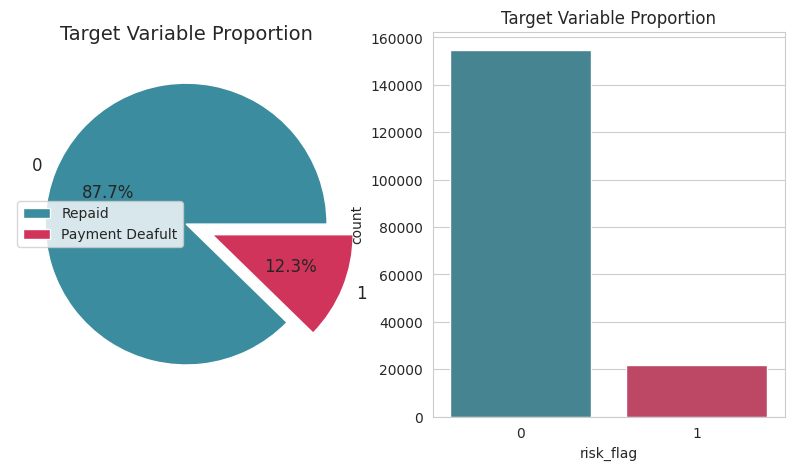

In [7]:
# Target variable proportion
plt.figure(figsize=(10,5))

# Pie chart
plt.subplot(1,2,1)
churn = data_train['risk_flag'].value_counts()
labels = data_train['risk_flag'].value_counts().index
explode = [0,0.2]
colors = ['#3a8c9e','#d1345b']

plt.title('Target Variable Proportion', fontsize=14)
plt.pie(churn, labels=labels, explode=explode, colors=colors,
        autopct='%.1f%%', textprops={'fontsize':12})
L = plt.legend()
L.get_texts()[0].set_text('Repaid')
L.get_texts()[1].set_text('Payment Deafult')

#Count plot
plt.subplot(1,2,2)
ax = sns.countplot(x=data_train['risk_flag'], order=data_train['risk_flag'].value_counts(ascending=False).index,
                   palette = colors)
values = data_train['risk_flag'].value_counts(ascending = False).values
plt.title('Target Variable Proportion')

### **Categorical Variable**

In [9]:
categorical_column = list(data_train.select_dtypes(include='object').columns)

categorical_column

['married', 'house_ownership', 'car_ownership', 'profession', 'city', 'state']

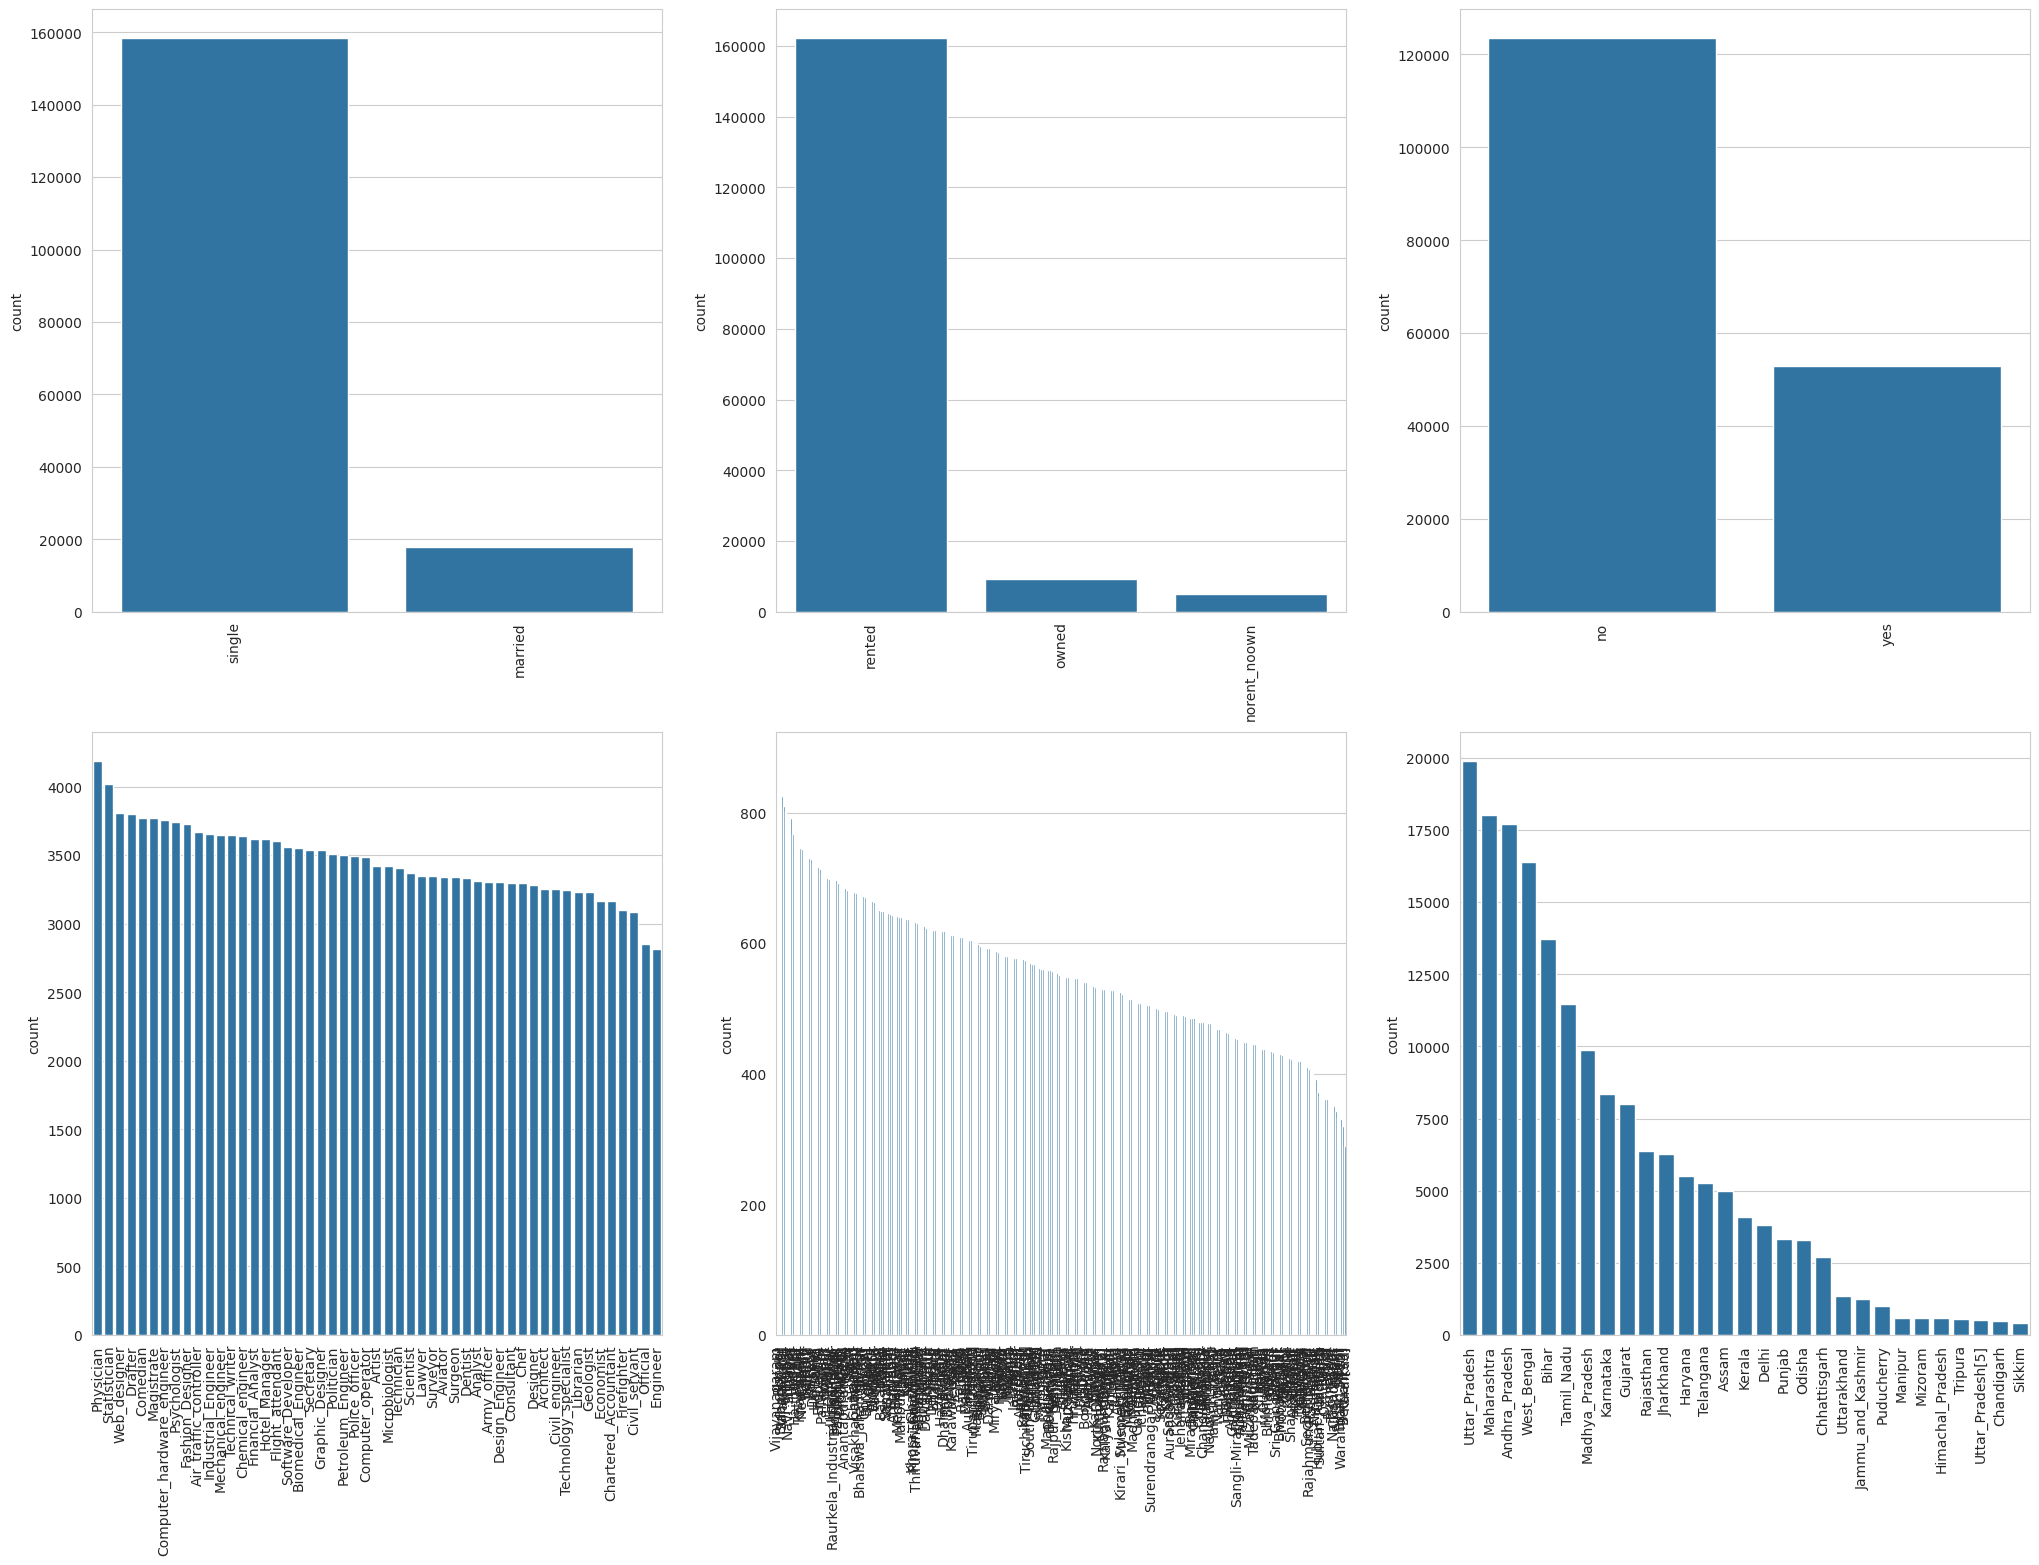

In [10]:
obj = (data_train.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize = (25, 36))
index = 1

for col in object_cols:
    y = data_train[col].value_counts()
    plt.subplot(4, 3, index)
    plt.xticks(rotation = 90)
    sns.barplot(x = list(y.index), y=y)
    index +=1

The charts demonstrate that a much greater proportion of loans are repaid on time than are not repaid. This shows that the number of observations for each target class is not distributed equally, which is an imbalance in the target variable.

### **Age of Loaners vs Loaner Condition (Risk Flag)**

In [11]:
def age_category(age):
    if age < 20:
        return 'Late Ten'
    elif age >= 20 and age < 30:
        return 'Twenty'
    elif age >= 30 and age < 40:
        return 'Thirty'
    elif age >= 40 and age < 50:
        return 'Fourty'
    elif age >= 50 and age < 60:
        return 'Fifty'
    else:
        return 'Above Sixty'

data_train['age_category'] = data_train['age'].apply(age_category)

In [12]:
print(f'''Min value Age Category Column:''')
print(data_train['age_category'].min())

print(f'''Max value Age Category Column:''')
print(data_train['age_category'].max())

print(f'''Value count Age Column:''')
print(data_train['age_category'].value_counts())

Min value Age Category Column:
Above Sixty
Max value Age Category Column:
Twenty
Value count Age Column:
age_category
Above Sixty    59866
Fourty         30056
Fifty          29855
Thirty         29281
Twenty         27342
Name: count, dtype: int64


In [13]:
df_1grouped = data_train.groupby(['age_category','risk_flag']).agg({'risk_flag' : ['count']})
df_1grouped = df_1grouped.reset_index()
df_1grouped.columns = ['AGE CATEGORY','TARGET STATUS','TOTAL LOANERS']
df_1grouped['RATIO'] = (df_1grouped['TOTAL LOANERS'])/len(data_train)*100
df_1grouped['RATIO ROUNDED'] = df_1grouped['RATIO'].apply(lambda x: round(x, 1))
df_1grouped

,AGE CATEGORY,TARGET STATUS,TOTAL LOANERS,RATIO,RATIO ROUNDED
0,Above Sixty,0,52914,29.996599,30.0
1,Above Sixty,1,6952,3.941043,3.9
2,Fifty,0,26258,14.885488,14.9
3,Fifty,1,3597,2.039116,2.0
4,Fourty,0,26466,15.003401,15.0
5,Fourty,1,3590,2.035147,2.0
6,Thirty,0,25707,14.573129,14.6
7,Thirty,1,3574,2.026077,2.0
8,Twenty,0,23358,13.241497,13.2
9,Twenty,1,3984,2.258503,2.3


Text(18.14038477366256, 0.5, '(%) Total Loaners')

<Figure size 2000x1200 with 0 Axes>

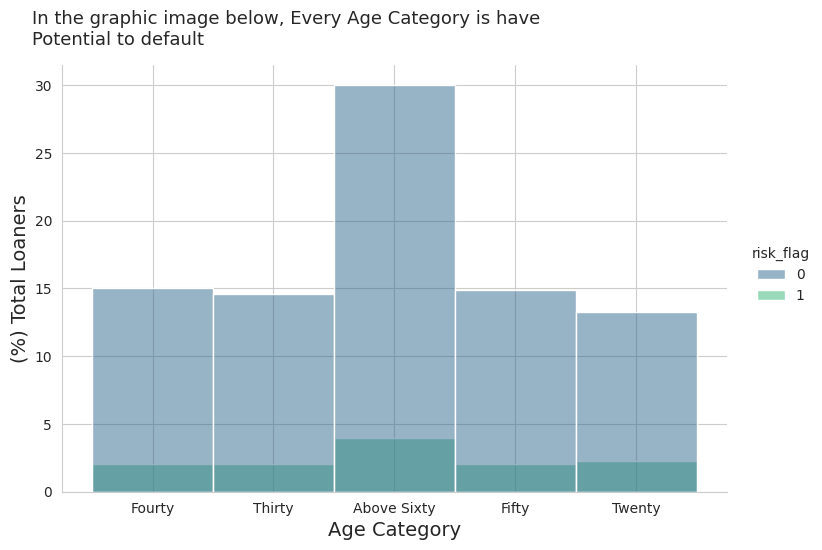

In [14]:
plt.figure(figsize=(20,12))
sns.displot(x='age_category', hue='risk_flag', data=data_train, palette='viridis', stat = 'percent',height=5, aspect=1.5)

plt.text(x=-1, y=33, s="In the graphic image below, Every Age Category is have\nPotential to default", 
         fontsize=13)

plt.xlabel('Age Category', fontsize=14)
plt.ylabel('(%) Total Loaners', fontsize=14)

Our most frequent clients are in the age above sixty. Therefore, as clients get older, there are fewer of them who will miss their payments the next month. Thus, it is evident that age has a significant role in determining the default payment for the following month.

### **Income Category with Loaner Condition (Risk Flag)**

In [15]:
data_train['income'].min()

10310

In [16]:
data_train['income'].max()

9999938

In [17]:
def income_category(income):
    if income < 250000:
        return '<250000'
    elif income >= 250000 and income < 500000:
        return '250000-500000'
    elif income >= 500000 and income < 750000:
        return '500000-750000'
    else:
        return '>750000'

data_train['income_cat'] = data_train['income'].apply(income_category)

In [18]:
data_train['income_cat'].value_counts()

income_cat
>750000          163486
250000-500000      4619
500000-750000      4148
<250000            4147
Name: count, dtype: int64

In [19]:
df_1grouped = data_train.groupby(['income_cat','risk_flag']).agg({'risk_flag' : ['count']})
df_1grouped = df_1grouped.reset_index()
df_1grouped.columns = ['INCOME CATEGORY','TARGET STATUS','TOTAL LOANERS']
df_1grouped['RATIO'] = (df_1grouped['TOTAL LOANERS'])/len(data_train)*100
df_1grouped['RATIO ROUNDED'] = df_1grouped['RATIO'].apply(lambda x: round(x, 1))
df_1grouped

,INCOME CATEGORY,TARGET STATUS,TOTAL LOANERS,RATIO,RATIO ROUNDED
0,250000-500000,0,4007,2.271542,2.3
1,250000-500000,1,612,0.346939,0.3
2,500000-750000,0,3616,2.049887,2.0
3,500000-750000,1,532,0.301587,0.3
4,<250000,0,3549,2.011905,2.0
5,<250000,1,598,0.339002,0.3
6,>750000,0,143531,81.366780,81.4
7,>750000,1,19955,11.312358,11.3


Text(18.14038477366256, 0.5, '(%) Total Loaners')

<Figure size 2000x1200 with 0 Axes>

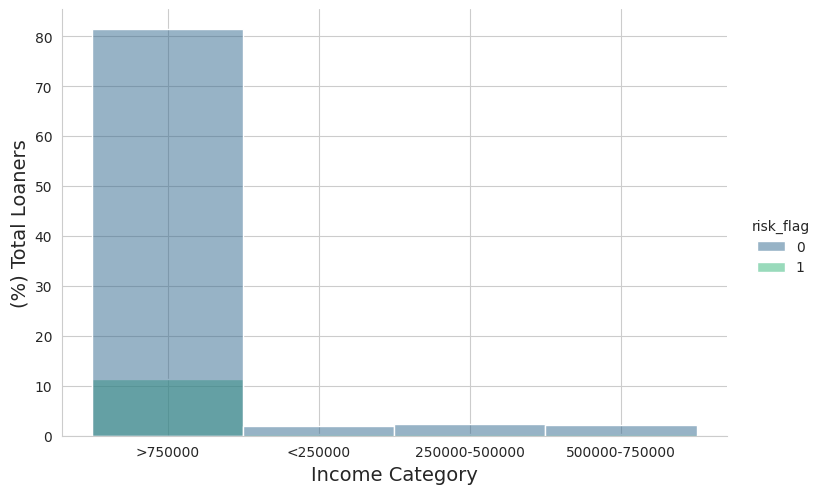

In [20]:
plt.figure(figsize=(20,12))
sns.displot(x='income_cat', hue='risk_flag', data=data_train, palette='viridis', stat = 'percent',height=5, aspect=1.5)

plt.xlabel('Income Category', fontsize=14)
plt.ylabel('(%) Total Loaners', fontsize=14)

### **Experience Category with Loaner Condition (Risk Flag)**

In [21]:
data_train['experience'].min()

0

In [22]:
data_train['experience'].max()

20

In [23]:
def experience_category(experience):
    if experience < 5:
        return '<5'
    elif experience >= 5 and experience < 10:
        return '5-10'
    elif experience >= 10 and experience < 15:
        return '10-15'
    else:
        return '>15'

data_train['experience_cat'] = data_train['experience'].apply(experience_category)

In [24]:
data_train['experience_cat'].value_counts()

experience_cat
>15      50664
10-15    42644
5-10     42595
<5       40497
Name: count, dtype: int64

In [25]:
df_1grouped = data_train.groupby(['experience_cat','risk_flag']).agg({'risk_flag' : ['count']})
df_1grouped = df_1grouped.reset_index()
df_1grouped.columns = ['EXPERIENCE CATEGORY','TARGET STATUS','TOTAL LOANERS']
df_1grouped['RATIO'] = (df_1grouped['TOTAL LOANERS'])/len(data_train)*100
df_1grouped['RATIO ROUNDED'] = df_1grouped['RATIO'].apply(lambda x: round(x, 1))
df_1grouped

,EXPERIENCE CATEGORY,TARGET STATUS,TOTAL LOANERS,RATIO,RATIO ROUNDED
0,10-15,0,37779,21.416667,21.4
1,10-15,1,4865,2.757937,2.8
2,5-10,0,37479,21.246599,21.2
3,5-10,1,5116,2.900227,2.9
4,<5,0,34644,19.639456,19.6
5,<5,1,5853,3.318027,3.3
6,>15,0,44801,25.397392,25.4
7,>15,1,5863,3.323696,3.3


Text(18.14038477366256, 0.5, '(%) Total Loaners')

<Figure size 2000x1200 with 0 Axes>

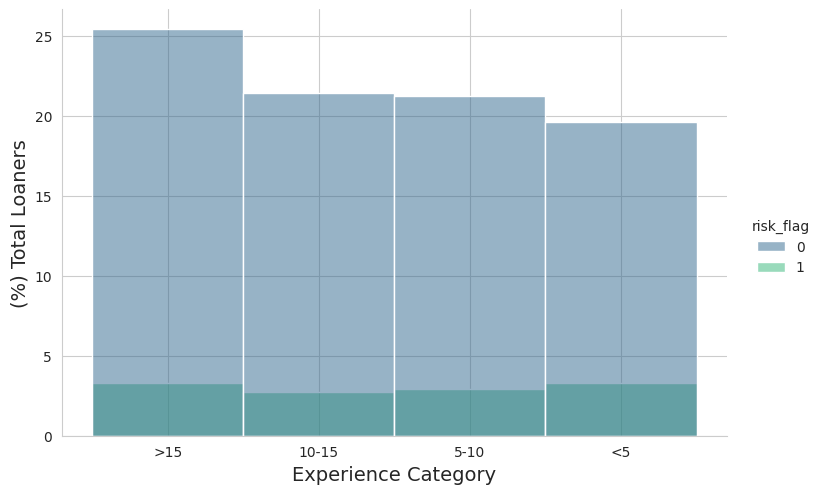

In [26]:
plt.figure(figsize=(20,12))
sns.displot(x='experience_cat', hue='risk_flag', data=data_train, palette='viridis', stat = 'percent',height=5, aspect=1.5)

plt.xlabel('Experience Category', fontsize=14)
plt.ylabel('(%) Total Loaners', fontsize=14)

### **Current Job Years Category with Loaner Condition (Risk Flag)**

In [27]:
data_train['current_job_years'].min()

0

In [28]:
data_train['current_job_years'].max()

14

In [29]:
def job_years_category(current_job_years):
    if current_job_years < 5:
        return '<5'
    elif current_job_years >= 5 and current_job_years < 10:
        return '5-10'
    else:
        return '>10'

data_train['job_years_cat'] = data_train['current_job_years'].apply(job_years_category)

In [30]:
data_train['job_years_cat'].value_counts()

job_years_cat
5-10    73063
<5      64144
>10     39193
Name: count, dtype: int64

In [31]:
df_1grouped = data_train.groupby(['job_years_cat','risk_flag']).agg({'risk_flag' : ['count']})
df_1grouped = df_1grouped.reset_index()
df_1grouped.columns = ['JOB YEARS CATEGORY','TARGET STATUS','TOTAL LOANERS']
df_1grouped['RATIO'] = (df_1grouped['TOTAL LOANERS'])/len(data_train)*100
df_1grouped['RATIO ROUNDED'] = df_1grouped['RATIO'].apply(lambda x: round(x, 1))
df_1grouped

,JOB YEARS CATEGORY,TARGET STATUS,TOTAL LOANERS,RATIO,RATIO ROUNDED
0,5-10,0,64522,36.577098,36.6
1,5-10,1,8541,4.841837,4.8
2,<5,0,55815,31.641156,31.6
3,<5,1,8329,4.721655,4.7
4,>10,0,34366,19.481859,19.5
5,>10,1,4827,2.736395,2.7


Text(18.14038477366256, 0.5, '(%) Total Loaners')

<Figure size 2000x1200 with 0 Axes>

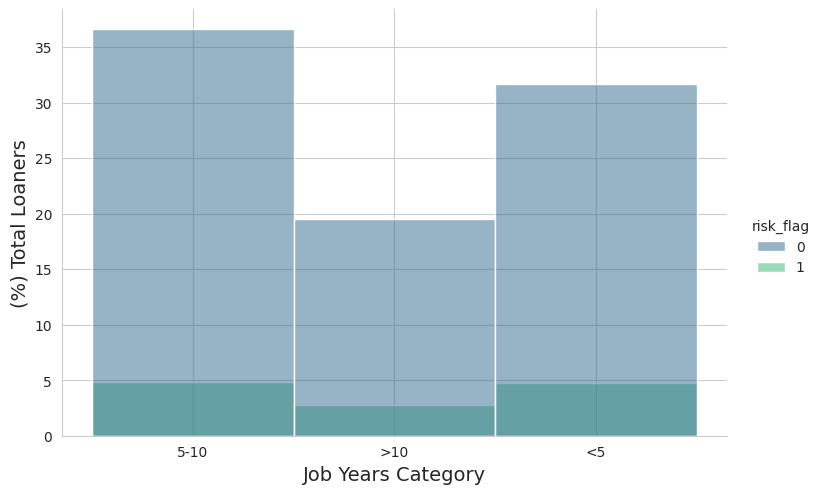

In [32]:
plt.figure(figsize=(20,12))
sns.displot(x='job_years_cat', hue='risk_flag', data=data_train, palette='viridis', stat = 'percent',height=5, aspect=1.5)

plt.xlabel('Job Years Category', fontsize=14)
plt.ylabel('(%) Total Loaners', fontsize=14)

### **Current House Years Category with Loaner Condition (Risk Flag)**

In [33]:
data_train['current_house_years'].min()

10

In [34]:
data_train['current_house_years'].max()

14

In [35]:
data_train['current_house_years'].value_counts()

current_house_years
12    36382
11    36320
13    35436
14    34271
10    33991
Name: count, dtype: int64

In [36]:
df_1grouped = data_train.groupby(['current_house_years','risk_flag']).agg({'risk_flag' : ['count']})
df_1grouped = df_1grouped.reset_index()
df_1grouped.columns = ['HOUSE YEARS CATEGORY','TARGET STATUS','TOTAL LOANERS']
df_1grouped['RATIO'] = (df_1grouped['TOTAL LOANERS'])/len(data_train)*100
df_1grouped['RATIO ROUNDED'] = df_1grouped['RATIO'].apply(lambda x: round(x, 1))
df_1grouped

,HOUSE YEARS CATEGORY,TARGET STATUS,TOTAL LOANERS,RATIO,RATIO ROUNDED
0,10,0,29701,16.837302,16.8
1,10,1,4290,2.431973,2.4
2,11,0,31803,18.028912,18.0
3,11,1,4517,2.560658,2.6
4,12,0,31954,18.114512,18.1
5,12,1,4428,2.510204,2.5
6,13,0,31120,17.641723,17.6
7,13,1,4316,2.446712,2.4
8,14,0,30125,17.077664,17.1
9,14,1,4146,2.350340,2.4


Text(5.0153847736625625, 0.5, '(%) Total Loaners')

<Figure size 2000x1200 with 0 Axes>

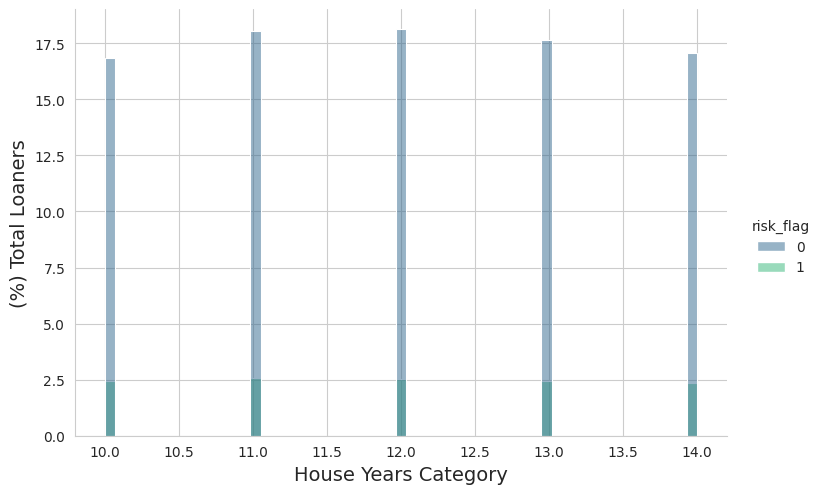

In [37]:
plt.figure(figsize=(20,12))
sns.displot(x='current_house_years', hue='risk_flag', data=data_train, palette='viridis', stat = 'percent',height=5, aspect=1.5)

plt.xlabel('House Years Category', fontsize=14)
plt.ylabel('(%) Total Loaners', fontsize=14)